In [114]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

In [115]:
import os
import urllib.request
url = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2017.csv"
url1 = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2016.csv"
url2 = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2015.csv"
urllib.request.urlretrieve(url,'2017.csv')
urllib.request.urlretrieve(url1,'2016.csv')
urllib.request.urlretrieve(url2,'2015.csv')

('2015.csv', <http.client.HTTPMessage at 0x22915dc4d30>)

In [116]:
data1 = pd.read_csv('2017.csv')

In [117]:
data1.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Data Loading

In [118]:
data1.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [119]:
data1.rename(columns={'Country':'Country', 'Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score',
 'Economy..GDP.per.Capita.':'Economy', 'Family':'Family',
       'Health..Life.Expectancy.':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust..Government.Corruption.':'Trust','Dystopia.Residual':'Dystopia_Residual'},inplace=True)

In [219]:
data1['Year'] = int("2017")

In [122]:
data1.head()

,Country,Happiness_Rank,Happiness_Score,Whisker.high,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual,Year
0,Norway,1,7.537,7.594445,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [123]:
data2 = pd.read_csv('2016.csv')

In [124]:
data2.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [125]:
data2.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [126]:
data2.drop(columns = {'Region'},axis = 1, inplace = True)

In [127]:
data2.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

In [220]:
data2['Year'] = int("2016") 

In [129]:
data2.head()

,Country,Happiness_Rank,Happiness_Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Denmark,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [130]:
data3 = pd.read_csv('2015.csv')

In [131]:
data3.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [132]:
data3.drop(columns = {'Region','Standard Error'},axis = 1, inplace = True)

In [222]:
data3["Year"] = int("2015")

In [223]:
frames =[data1,data2,data3]
data = pd.concat(frames)

In [224]:
data.head()

,Country,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Year
0,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,NaN,7.594445,2017
1,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,NaN,7.581728,2017
2,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,NaN,7.622030,2017
3,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,NaN,7.561772,2017
4,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,NaN,7.527542,2017


Data description

In [225]:
data.describe()

,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,157.000000,470.000000,157.000000,155.000000,470.000000
mean,2.092717,0.927830,0.990347,0.402828,0.242241,78.829787,5.370728,0.579968,5.282395,0.134790,5.481975,5.452326,2015.993617
std,0.565772,0.415584,0.318707,0.150356,0.131543,45.281408,1.136998,0.240161,1.148043,0.111313,1.136493,1.118542,0.816907
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,2.732000,0.000000,3.078000,2.864884,2015.000000
25%,1.737975,0.605292,0.793000,0.297615,0.152831,40.000000,4.509000,0.402301,4.327000,0.059777,4.465000,4.608172,2015.000000
50%,2.094640,0.995439,1.025665,0.418347,0.223140,79.000000,5.282500,0.630053,5.237000,0.099502,5.419000,5.370032,2016.000000
75%,2.455575,1.252443,1.228745,0.516850,0.315824,118.000000,6.233750,0.768298,6.154000,0.173161,6.434000,6.194600,2017.000000
max,3.837720,1.870766,1.610574,0.669730,0.838075,158.000000,7.587000,1.025250,7.460000,0.551910,7.669000,7.622030,2017.000000


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 157
Data columns (total 14 columns):
Country                      470 non-null object
Dystopia_Residual            470 non-null float64
Economy                      470 non-null float64
Family                       470 non-null float64
Freedom                      470 non-null float64
Generosity                   470 non-null float64
Happiness_Rank               470 non-null int64
Happiness_Score              470 non-null float64
Health                       470 non-null float64
Lower Confidence Interval    157 non-null float64
Trust                        470 non-null float64
Upper Confidence Interval    157 non-null float64
Whisker.high                 155 non-null float64
Year                         470 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.1+ KB


In [227]:
data.head()

,Country,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Year
0,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,NaN,7.594445,2017
1,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,NaN,7.581728,2017
2,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,NaN,7.622030,2017
3,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,NaN,7.561772,2017
4,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,NaN,7.527542,2017


In [228]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Country                        0
Dystopia_Residual              0
Economy                        0
Family                         0
Freedom                        0
Generosity                     0
Happiness_Rank                 0
Happiness_Score                0
Health                         0
Lower Confidence Interval    313
Trust                          0
Upper Confidence Interval    313
Whisker.high                 315
Year                           0
dtype: int64

Data is clean as there are no missing values.

In [229]:
data.shape

(470, 14)

In [231]:
data.drop(columns = 'Whisker.low',axis = 1, inplace = True)
data.drop(columns = 'Whisker.high',axis = 1, inplace = True)
data.drop(columns = 'Lower Confidence Interval',axis = 1, inplace = True)
data.drop(columns = 'Upper Confidence Interval',axis = 1, inplace = True)

In [232]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Country              0
Dystopia_Residual    0
Economy              0
Family               0
Freedom              0
Generosity           0
Happiness_Rank       0
Happiness_Score      0
Health               0
Trust                0
Year                 0
dtype: int64

## Multivariate linear model

#### The need of multiple regression  : Regress 'Family' and 'Health Life Expectancy' on 'Happiness Score'

In [163]:
corr=data.corr()
corr

,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high
Dystopia_Residual,1.000000,0.030087,-0.081537,0.038422,-0.114468,-0.482706,0.489747,0.057674,0.538793,0.000001,0.548164,0.478824
Economy,0.030087,1.000000,0.585449,0.344962,-0.014173,-0.790551,0.785450,0.792224,0.790673,0.301935,0.789140,0.811868
Family,-0.081537,0.585449,1.000000,0.425377,0.071775,-0.637627,0.636532,0.486383,0.741523,0.158605,0.736184,0.750934
Freedom,0.038422,0.344962,0.425377,1.000000,0.343389,-0.547627,0.560353,0.359566,0.566857,0.490405,0.566203,0.569907
Generosity,-0.114468,-0.014173,0.071775,0.343389,1.000000,-0.146162,0.163562,0.077326,0.158025,0.287414,0.155495,0.155462
Happiness_Rank,-0.482706,-0.790551,-0.637627,-0.547627,-0.146162,1.000000,-0.993268,-0.750146,-0.994928,-0.384371,-0.995525,-0.993058
Happiness_Score,0.489747,0.785450,0.636532,0.560353,0.163562,-0.993268,1.000000,0.748040,0.999485,0.406340,0.999474,0.999497
Health,0.057674,0.792224,0.486383,0.359566,0.077326,-0.750146,0.748040,1.000000,0.769177,0.262932,0.760752,0.776634
Lower Confidence Interval,0.538793,0.790673,0.741523,0.566857,0.158025,-0.994928,0.999485,0.769177,1.000000,0.404840,0.997919,NaN
Trust,0.000001,0.301935,0.158605,0.490405,0.287414,-0.384371,0.406340,0.262932,0.404840,1.000000,0.398775,0.426459


### Finding correlation between various columns

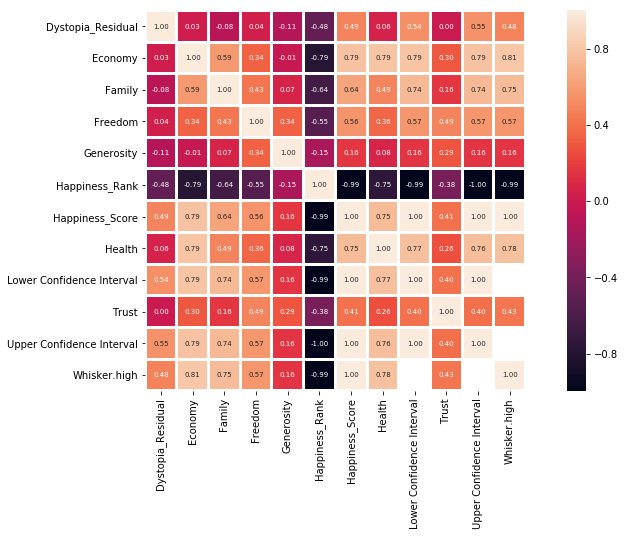

In [164]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

KeyError: 'Region'

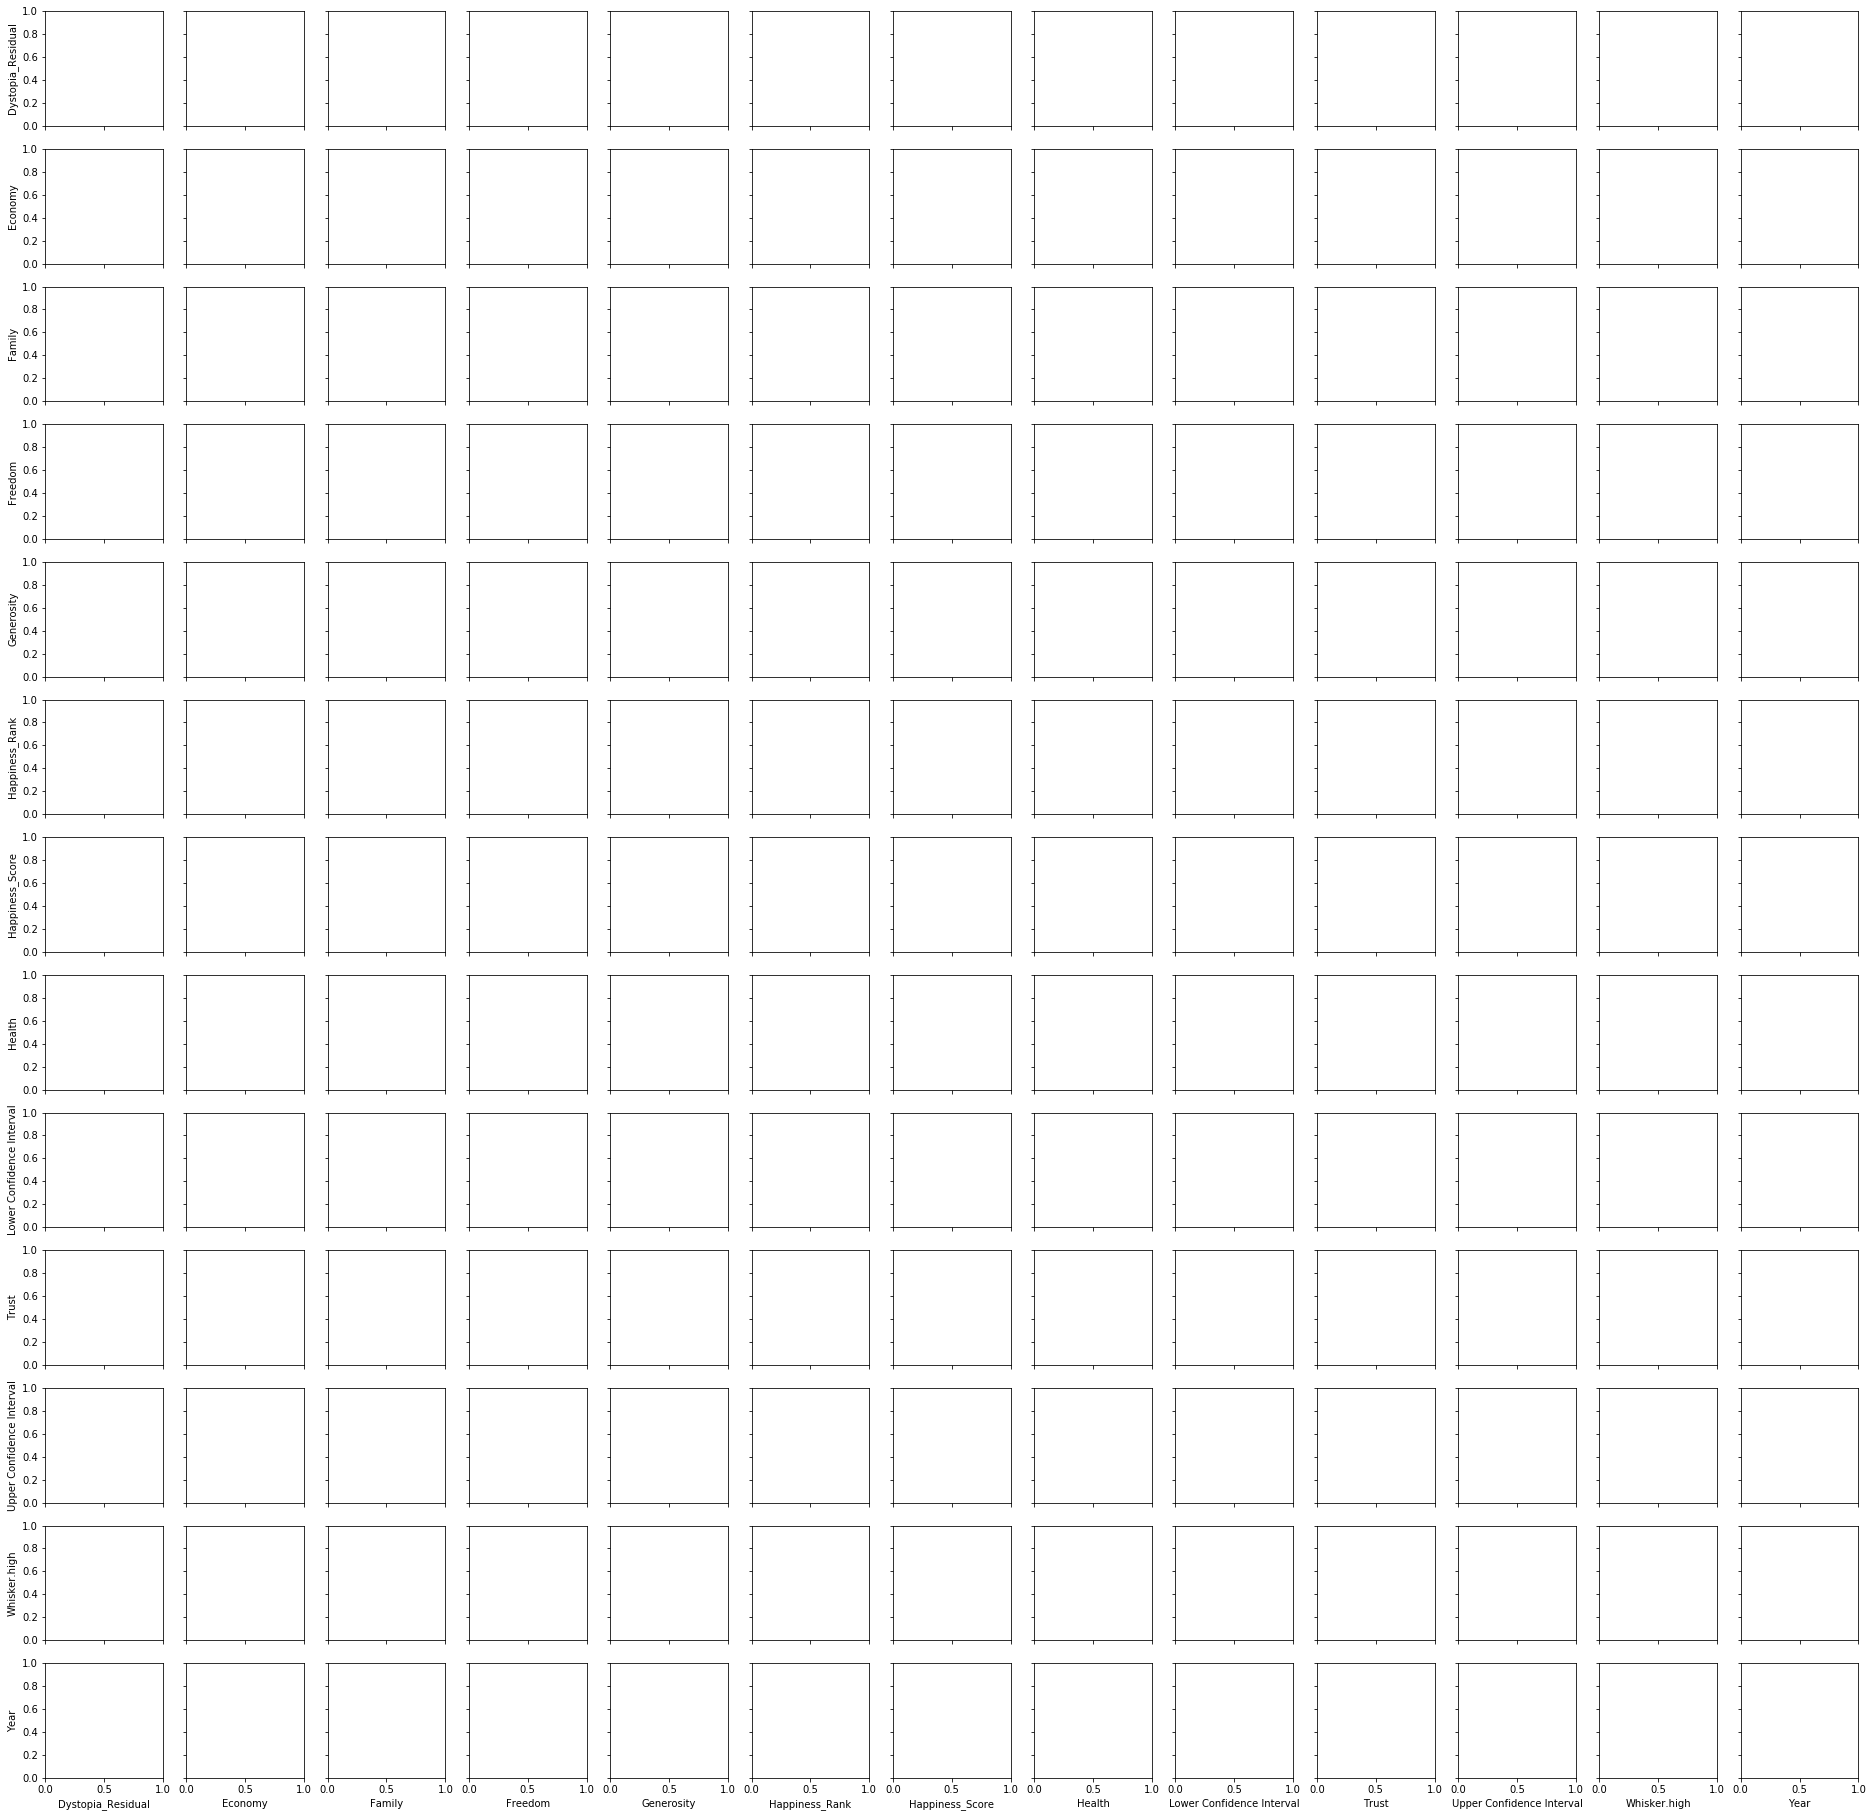

In [165]:
sns.pairplot(data, hue="Region")
#plt.show()

### Verifying the assumptions 

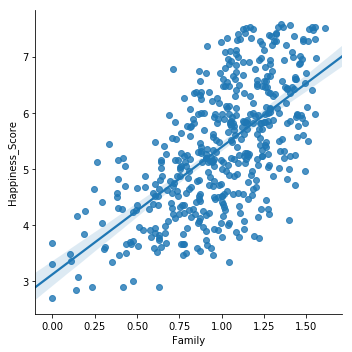

In [166]:
sns.lmplot(y="Happiness_Score", x="Family", data=data)
#3sns.plt.show()

##### As family is the dependant variable, family is correlated to Happiness Score and not violating the assumptions

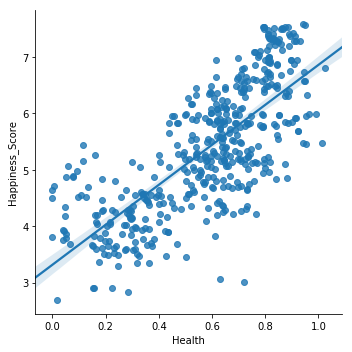

In [167]:
sns.lmplot(y="Happiness_Score", x="Health", data=data)
#sns.plt.show()

##### As Health Life Expectancy is the dependant variable, Health Life Expectancy is correlated to Happiness Score and not violating the assumptions

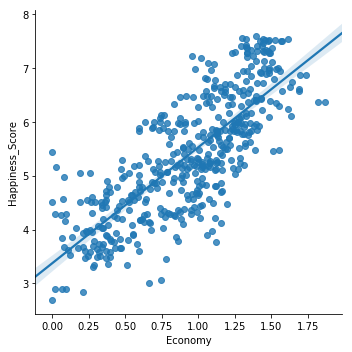

In [168]:
sns.lmplot(y="Happiness_Score", x="Economy", data=data)
#sns.plt.show()

##### As Economy GDP per Capita. is the dependant variable, Economy GDP per Capita. is correlated to Happiness Score and not violating the assumptions

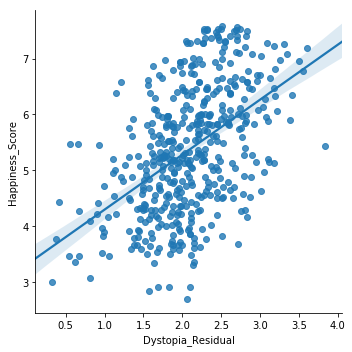

In [169]:
sns.lmplot(y="Happiness_Score", x="Dystopia_Residual", data=data)

##### As Dystopia Residual is the dependant variable, Dystopia Residual is correlated to Happiness Score and not violating the assumptions

### Checking if predictor variables are independent

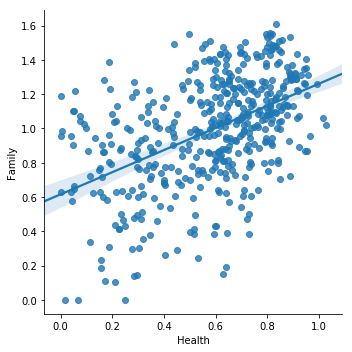

In [170]:
sns.lmplot(y="Family", x="Health", data=data)
#sns.plt.show()

##### Seems like family and Health Life Expectancy are correlated  to each other. So we can take either family or Health Life Expectancy

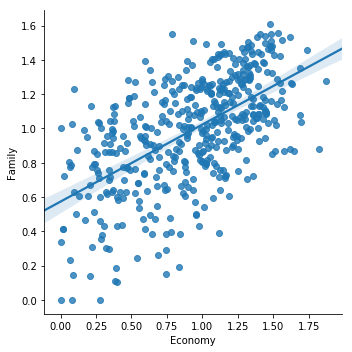

In [171]:
sns.lmplot(y="Family", x="Economy", data=data)
#sns.plt.show()

#### Seems like family and Economy GDP per Capita  are correlated to each other. So we can take either family or Economy GDP per Capita

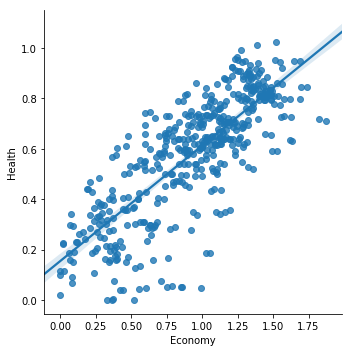

In [172]:
sns.lmplot(y="Health", x="Economy", data=data)
#sns.plt.show()

#### Seems like Health Life Expectancy and Economy GDP per Capita  are correlated to each other. So we can take either Health Life Expectancy or Economy GDP per Capita

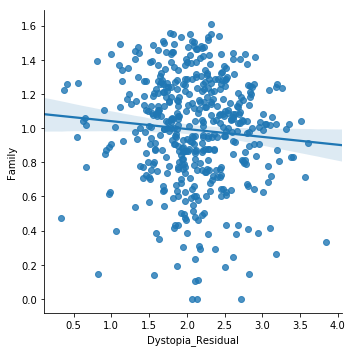

In [173]:
sns.lmplot(y="Family", x="Dystopia_Residual", data=data)

In [177]:
data.columns

Index(['Country', 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Happiness_Score', 'Health', 'Trust',
       'Year'],
      dtype='object')

##### Seems like Family and Dystopia Residual are not correlated to each other. So we can take both Family and Dystopia Residual.

In [233]:
X = data[['Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Health', 'Trust',
       'Year']]
y = data['Happiness_Score']

In [199]:
type(y)

pandas.core.frame.DataFrame

### Feature Selection

In [234]:
import statsmodels.api as sm

def stepwise_selection(X1, y1,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out = 0.05,
                      verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X1.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

       # backward step
        model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included]))).fit()
       # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  Happiness_Rank                 with p-value 0.0
Add  Trust                          with p-value 4.98738e-07
Add  Year                           with p-value 0.000267933
Add  Dystopia_Residual              with p-value 0.00549651
Add  Family                         with p-value 2.54709e-08
Add  Economy                        with p-value 3.66289e-13
Add  Generosity                     with p-value 3.27681e-30
Add  Health                         with p-value 5.06438e-36
Add  Freedom                        with p-value 0.0


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Drop Year                           with p-value 0.606171
Drop Happiness_Rank                 with p-value 0.291477
resulting features:
['Trust', 'Dystopia_Residual', 'Family', 'Economy', 'Generosity', 'Health', 'Freedom']


In [235]:
#RFE

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True False False]
[2 1 3 1 1 6 1 4 5]


In [236]:
# BORUTA
import statsmodels.api as sm
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = X.values
y = y.values

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_estimators=100 , max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	66 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


array([3, 1, 3, 1, 5, 1, 1, 2, 1])

In [237]:
# TPOT

from sklearn.cross_validation import train_test_split  
from tpot import TPOTRegressor  
X = X 
y = y  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                   train_size=0.75,  
                                                   test_size=0.25)  
my_tpot = TPOTRegressor(generations=5, population_size = 20 , verbosity= 2)
my_tpot.fit(X_train, y_train)  
#print(my_tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -8.228067484218558e-08


Generation 2 - Current best internal CV score: -8.228067484218558e-08


Generation 3 - Current best internal CV score: -8.228067484212908e-08


Generation 4 - Current best internal CV score: -8.228067484212908e-08


Generation 5 - Current best internal CV score: -8.215335392079574e-08



Best pipeline: LassoLarsCV(SelectPercentile(input_matrix, percentile=99), normalize=True)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=5, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
       offspring_size=20, periodic_checkpoint_folder=None,
       population_size=20, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

### Regression models

In [294]:
metrics_data = pd.DataFrame()

In [373]:
## Linear Regression_Part4
## Training Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
y = list(y)
prediction = lm.predict(X_train)
r2_train = r2_score(y_train, prediction)
mse = mean_squared_error(y_train, prediction)
mae_train = mean_absolute_error(y_train, prediction)
rmse_train = np.sqrt(mse)
mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
print("mean absolute error = " , mae_train)
#print(mse)
print("Root Mean Square Error= " , rmse_train)
print("Root Sqaure = " , r2_train)
print("Mape = " , mape_train)
accuracy_train = lm.score(X_train, y_train)
print(accuracy_train)
model = sm.OLS(y_train,prediction)
results = model.fit()
results.summary()
print('Accuracy testing : {:.3f}'.format(rf.score(X_train, y_train)))

mean absolute error =  0.00024162511306329105
Root Mean Square Error=  0.00028048407480818326
Root Sqaure =  0.9999999374887778
Mape =  0.004735513266185673
0.9999999374887778
Accuracy testing : 1.000


In [374]:
## Linear Regression_Part4
## Testing Dataset

lm = LinearRegression()
lm.fit(X_train,y_train)
y = list(y)
prediction = lm.predict(X_test)
r2_test = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae_test = mean_absolute_error(y_test, prediction)
rmse_test = np.sqrt(mse)
mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
print("mean absolute error = " , mae_test)
print("Root Mean Square Error= " , rmse_test)
print("Root Sqaure = " ,  r2_test)
print("Mape = " , mape_test)
accuracy_test = lm.score(X_test, y_test)
print(accuracy_test)
model = sm.OLS(y_test,prediction)
results = model.fit()
results.summary()
print('Accuracy testing : {:.3f}'.format(rf.score(X_test, y_test)))

mean absolute error =  0.00026047753762482655
Root Mean Square Error=  0.00030812828246065704
Root Sqaure =  0.9999999325410636
Mape =  0.005083008741481732
0.9999999325410636
Accuracy testing : 0.993


In [375]:
linear_regression = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train

In [376]:
linear_regression = list(linear_regression)

In [377]:
metrics = pd.DataFrame(linear_regression,index =['accuracy_test' ,'rmse_test','r2_test','accuracy_train' ,'rmse_train','r2_train'],columns=['LinearRegression'])

In [378]:
## RandomForest Regression
## Testing Dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = np.random)
#rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
prediction = rf.predict(X_test)
r2_test = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae_test = mean_absolute_error(y_test, prediction)
rmse_test = np.sqrt(mse)
mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
print("mean absolute error = " , mae_test)
print("Root Mean Square Error= " , rmse_test)
print("Root Sqaure = " ,  r2_test)
print("Mape = " , mape_test)
accuracy_test = rf.score(X_test, y_test)
print(accuracy_test)
model = sm.OLS(y_test,prediction)

# Calculate and display accuracy

print('Accuracy testing : {:.3f}'.format(rf.score(X_test, y_test)))

mean absolute error =  0.059579568924819734
Root Mean Square Error=  0.09736937595048731
Root Sqaure =  0.9932637044008288
Mape =  1.4036329655438118
0.9932637044008287
Accuracy testing : 0.993


In [379]:
## RandomForest Regression
## Training Dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = np.random)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
prediction = rf.predict(X_train)
r2_train = r2_score(y_train, prediction)
mse = mean_squared_error(y_train, prediction)
mae_train = mean_absolute_error(y_train, prediction)
rmse_train = np.sqrt(mse)
mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
print("mean absolute error = " , mae_train)
print("Root Mean Square Error= " , rmse_train)
print("Root Sqaure = " , r2_train)
print("Mape = " , mape_train)
accuracy_train = rf.score(X_train, y_train)
print(accuracy_train)
model = sm.OLS(y_train,prediction)
results = model.fit()
results.summary()

# Calculate and display accuracy

print('Accuracy testing : {:.3f}'.format(rf.score(X_train, y_train)))

mean absolute error =  0.017723777953410316
Root Mean Square Error=  0.023979741692937314
Root Sqaure =  0.9995430900923231
Mape =  0.366757243570867
0.9995430900923231
Accuracy testing : 1.000


In [380]:
Random_forest = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train

In [381]:
Random_forest = list(Random_forest)

In [382]:
metrics1 = pd.DataFrame(Random_forest,index =['accuracy_test' ,'rmse_test' ,'r2_test','accuracy_train' ,'rmse_train' ,'r2_train'],columns=['RandomForestRegressor'])

In [383]:
metrics_data = metrics.merge(metrics1, left_index=True, right_index=True, how='inner')

In [384]:
metrics_data

,LinearRegression,RandomForestRegressor
accuracy_test,1.000000,0.993264
rmse_test,0.000308,0.097369
r2_test,1.000000,0.993264
accuracy_train,1.000000,0.999543
rmse_train,0.000280,0.023980
r2_train,1.000000,0.999543


In [385]:
# EXTRA TREE REGRESSOR
#Train Data
from sklearn.ensemble import ExtraTreesRegressor

extr = ExtraTreesRegressor(n_estimators = 50, random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

extr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
prediction = extr.predict(X_train)
r2_train = r2_score(y_train, prediction)
mse = mean_squared_error(y_train, prediction)
mae_train = mean_absolute_error(y_train, prediction)
rmse_train = np.sqrt(mse)
mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
print("mean absolute error = " , mae_train)
print("Root Mean Square Error= " , rmse_train)
print("Root Sqaure = " , r2_train)
print("Mape = " , mape_train)
accuracy_train = extr.score(X_train, y_train)
print(accuracy_train)
model = sm.OLS(y_train,prediction)
results = model.fit()
results.summary()

# Calculate and display accuracy

print('Accuracy testing : {:.3f}'.format(extr.score(X_train, y_train)))

mean absolute error =  7.43225792966333e-10
Root Mean Square Error=  3.7428684771542635e-09
Root Sqaure =  1.0
Mape =  1.4612008436720516e-08
1.0
Accuracy testing : 1.000


In [386]:
# EXTRA TREE REGRESSOR
#Test Data
from sklearn.ensemble import ExtraTreesRegressor

extr = ExtraTreesRegressor(n_estimators = 50, random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

extr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
prediction = extr.predict(X_test)
r2_test = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae_test = mean_absolute_error(y_test, prediction)
rmse_test = np.sqrt(mse)
mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
print("mean absolute error = " , mae_test)
print("Root Mean Square Error= " , rmse_test)
print("Root Sqaure = " ,  r2_test)
print("Mape = " , mape_test)
accuracy_test = extr.score(X_test, y_test)
print(accuracy_test)
model = sm.OLS(y_test,prediction)
# Calculate and display accuracy

print('Accuracy testing : {:.3f}'.format(extr.score(X_train, y_train)))

mean absolute error =  0.04293191091598328
Root Mean Square Error=  0.08087852532613403
Root Sqaure =  0.9953522494447291
Mape =  1.0375268775888555
0.9953522494447291
Accuracy testing : 1.000


In [387]:
Extra_Tree = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train

In [388]:
Extra_Tree = list(Extra_Tree)

In [389]:
metrics2 = pd.DataFrame(Extra_Tree,index =['accuracy_test' ,'rmse_test' ,'r2_test','accuracy_train' ,'rmse_train','r2_train'],columns=['ExtraTreeRegressor'])

In [390]:
metrics_data = metrics_data.merge(metrics2, left_index=True, right_index=True, how='inner')

In [391]:
metrics_data

,LinearRegression,RandomForestRegressor,ExtraTreeRegressor
accuracy_test,1.000000,0.993264,9.953522e-01
rmse_test,0.000308,0.097369,8.087853e-02
r2_test,1.000000,0.993264,9.953522e-01
accuracy_train,1.000000,0.999543,1.000000e+00
rmse_train,0.000280,0.023980,3.742868e-09
r2_train,1.000000,0.999543,1.000000e+00


### Regulization

### L2

In [245]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

ridgeReg.score(X_test,y_test)


0.997359540844881

Text(0.5,1,'Ridge Regression')

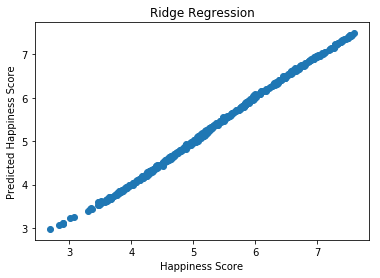

In [246]:
y_predr = ridgeReg.predict(X)

plt.scatter(y, y_predr)
plt.xlabel("Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Ridge Regression")

### L2

In [247]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.03, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

lassoReg.score(X_test,y_test)

0.6945924322172851

### Elastic Net

In [248]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

ENreg.score(X_test,y_test)

0.9788605606548964

In [249]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
   # kf = KFold(len(X), n_folds=5)
    kf = cross_validation.KFold(len(X), n_folds=3, shuffle=False, random_state=None)

    xval_err = 0
    for train, test in kf:
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        err = y_pred - y_test
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 0.0012		 0.0018
0.418	 0.0352		 0.0466
0.826	 0.0548		 0.0681
1.234	 0.0676		 0.0807
1.642	 0.0766		 0.0889
2.050	 0.0832		 0.0947
2.458	 0.0884		 0.0991
2.866	 0.0925		 0.1025
3.274	 0.0958		 0.1051
3.682	 0.0985		 0.1073
4.090	 0.1009		 0.1091
4.498	 0.1029		 0.1107
4.906	 0.1046		 0.1120
5.313	 0.1061		 0.1131
5.721	 0.1075		 0.1141
6.129	 0.1086		 0.1150
6.537	 0.1097		 0.1158
6.945	 0.1107		 0.1165
7.353	 0.1115		 0.1171
7.761	 0.1123		 0.1177
8.169	 0.1130		 0.1182
8.577	 0.1137		 0.1186
8.985	 0.1143		 0.1191
9.393	 0.1149		 0.1195
9.801	 0.1154		 0.1198
10.209	 0.1159		 0.1202
10.617	 0.1163		 0.1205
11.025	 0.1167		 0.1208
11.433	 0.1171		 0.1210
11.841	 0.1175		 0.1213
12.249	 0.1178		 0.1215
12.657	 0.1182		 0.1218
13.065	 0.1185		 0.1220
13.473	 0.1188		 0.1222
13.881	 0.1190		 0.1224
14.289	 0.1193		 0.1225
14.697	 0.1195		 0.1227
15.104	 0.1198		 0.1229
15.512	 0.1200		 0.1230
15.920	 0.1202		 0.1232
16.328	 0.1204		 0.1

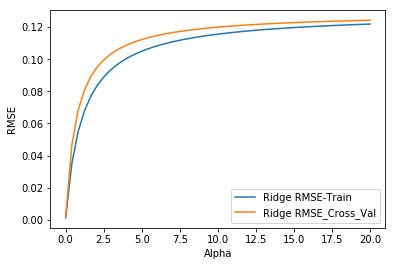

In [250]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

### Cross Validation

In [251]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
accuracies = cross_val_score(ExtraTreesRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean() 

0.9975780949570086

In [252]:
accuracies = cross_val_score(ExtraTreesRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean() 

0.997549773882325

In [253]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
accuracies = cross_val_score(RandomForestRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean()  

0.9958358616856888

In [254]:
accuracies = cross_val_score(RandomForestRegressor(), X=X_test, y=y_test,cv=5)
accuracies.mean()

0.9808496871803772

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(LinearRegression(), X=X_train, y=y_train,cv=5)
accuracies.mean()  

0.9999999304556747

In [256]:
accuracies = cross_val_score(LinearRegression(), X=X_test, y=y_test,cv=5)
accuracies.mean() 

0.999999916606237

In [257]:
from sklearn.model_selection import KFold

In [258]:
kf_total = cross_validation.KFold(len(X), n_folds=10, shuffle=True, random_state=4)
for train, test in kf_total:
    print (train, '\n', test, '\n\n')

[  0   1   2   3   4   5   7   8   9  10  12  13  15  16  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  48  49  50  51  52  53  54  56  57  58  59
  60  61  62  65  67  69  70  71  72  73  74  75  76  77  78  79  81  82
  83  84  85  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 107 108 109 110 111 112 113 114 115 116 118 119 120 121
 122 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198
 199 200 201 203 204 206 207 208 210 211 212 213 215 216 217 218 219 220
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 257 258 259
 260 261 263 264 265 267 269 270 271 272 273 274 27

 460 461 462 463 464 465 467 468 469] 
 [ 16  17  20  39  65  69  71  91 101 110 137 144 147 159 167 170 204 213
 223 232 244 248 261 269 270 286 310 314 317 324 333 341 342 345 353 356
 376 378 382 388 394 401 408 426 432 457 466] 


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  24  25  26  27  29  30  31  32  33  34  36  38  39  40
  41  42  43  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 112 114 115 117
 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 183 184 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 20

 458 459 460 461 462 463 465 466 469] 
 [  0  21  30  44  49  52  56  58  87  94 109 122 126 136 149 161 164 168
 174 183 194 197 201 243 252 288 294 306 311 313 322 343 359 360 373 385
 387 393 416 422 434 439 446 456 464 467 468] 




### Bias-Variance Trade-Off

<module 'matplotlib.pyplot' from 'C:\\Users\\mehta\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

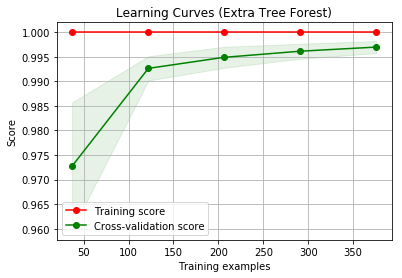

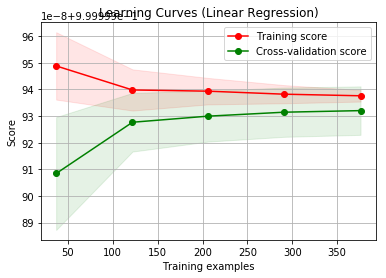

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
       estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()

title = "Learning Curves (Extra Tree Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = ExtraTreesRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

### Clustering Algorithms


In [264]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\mehta\AppData\Local\pip\Cache\wheels\33\be\39\f82c0f53ea29777fdc29afaf7bfad87442488a280662d355fb
Successfully built plotly


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [269]:
from sklearn import cluster, mixture # For clustering 
import types
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [275]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [277]:
print(centroids)

[[1.80870641e+00 5.25398675e-01 7.40111833e-01 3.23031121e-01
  2.38959742e-01 1.31341935e+02 3.47704317e-01 1.08548153e-01
  2.01598065e+03]
 [2.42308114e+00 1.27779047e+00 1.20500877e+00 5.05930715e-01
  2.74133132e-01 2.69937107e+01 7.64316638e-01 2.00253815e-01
  2.01600000e+03]
 [2.03818862e+00 9.70991358e-01 1.02018713e+00 3.77027041e-01
  2.12996027e-01 7.94871795e+01 6.22849145e-01 9.41403457e-02
  2.01600000e+03]]


In [278]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

In [279]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [280]:
n_clusters=6

In [287]:
data.columns

Index(['Country', 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Happiness_Score', 'Health', 'Trust',
       'Year'],
      dtype='object')

In [293]:
dataset=data.iloc[:,:1]
dataset

,Country
0,Norway
1,Denmark
2,Iceland
3,Switzerland
4,Finland
5,Netherlands
6,Canada
7,New Zealand
8,Sweden
9,Australia


In [291]:
dataset.columns

Index(['Country'], dtype='object')

In [289]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset=ss.fit_transform(dataset)

ValueError: could not convert string to float: 'Togo'